# ETAPA FINAL - Processo Seletivo
# Bolsa de pesquisa na área de dados da FGV Direito Rio

## Candidato: José Valentim Rosa

## Fontes:

* [GOVERNO ABERTO SP](http://catalogo.governoaberto.sp.gov.br/dataset/869-pesquisa-origem-e-destino)

#### Orientações
Com as informações de 2007 gostaríamos que respondesse as seguintes perguntas:

1. Analisando as variáveis e informação que a base contém, que perguntas você acha possível fazer para essa base? Outras bases de dados podem ser usadas em conjunto com essa, se sim, diga quais são elas. Guie-se pelo quão interessante você acha a pergunta. São sugeridas 3 pergutas.

2. Quais são as variáveis socioeconomicas que impactam em como pessoas de setores distintos escolhem seus modos de locomoção?
Em modos de locomoção, considere: público e particular. Sobre as variáveis socioeconomicas, qualquer que está na base pode ser utilizada.

As soluções tem que estar documentadas no seu GitHub até o final do dia 14 de junho. Tenha em mente que é mais importante uma solução simples, completa, documentada e informativa do que um complexa, incompleta, não documentada e confusa.

## 1. Carregando bibliotecas

In [135]:
import pysal as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.2)
pal = sns.color_palette()
sns.set(color_codes=True)
sns.set_style('darkgrid')

## 2. Importando os dados

A função dbf_PDF criada abaixo, pega o arquivo originalmente salvo no formato dbf, que é um tipo de formato de banco de dados, e retorna um Pandas DataFrame.

In [136]:
def dbf_PDF(dbfile, upper=True):
    dbf = ps.open(dbfile)
    PDF = pd.DataFrame(dbf[:])
    if upper == True:
        PDF.columns = map(str.upper, dbf.header) 
    dbf.close() 
    return PDF

In [137]:
df = dbf_PDF("OD_2007_v2d.dbf")

In [138]:
df

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,DURACAO,MODOPRIN,TIPOVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,TP_ESBICI,ID_ORDEM,DISTANCIA
0,1,36,333729.0,7394430.0,0010001,1,17.97777,1,6,2007-08-17,...,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,1,604.07
1,1,36,333729.0,7394430.0,0010001,0,17.97777,1,6,2007-08-17,...,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,2,604.07
2,1,36,333858.0,7394484.0,0010018,1,17.67677,18,6,2007-08-16,...,75.0,12.0,1.0,2.0,NaN,NaN,NaN,NaN,3,26271.11
3,1,36,333858.0,7394484.0,0010018,0,17.67677,18,6,2007-08-16,...,80.0,12.0,1.0,2.0,NaN,NaN,NaN,NaN,4,26271.11
4,1,36,333858.0,7394484.0,0010018,0,17.67677,18,6,2007-08-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
5,1,36,333801.0,7394422.0,0010019,1,17.67677,19,6,2007-08-16,...,30.0,15.0,4.0,NaN,NaN,NaN,1.0,3.0,6,997.57
6,1,36,333801.0,7394422.0,0010019,0,17.67677,19,6,2007-08-16,...,30.0,15.0,4.0,NaN,NaN,NaN,1.0,3.0,7,997.57
7,1,36,333801.0,7394422.0,0010019,0,17.67677,19,6,2007-08-16,...,30.0,15.0,4.0,NaN,NaN,NaN,1.0,3.0,8,997.57
8,1,36,333801.0,7394422.0,0010019,0,17.67677,19,6,2007-08-16,...,30.0,15.0,4.0,NaN,NaN,NaN,1.0,3.0,9,997.57
9,1,36,333801.0,7394422.0,0010019,0,17.67677,19,6,2007-08-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196698 entries, 0 to 196697
Columns: 123 entries, ZONA to DISTANCIA
dtypes: float64(93), int64(25), object(5)
memory usage: 184.6+ MB


## 3. Análise Exploratória dos dados

Afim de se conhecer os dados, com base nas informações contidas na documentação, foram escolhidos algumas variáveis para serem analisadas. A essa filtragem denominamos df1.

In [222]:
df1 = df[['DATA','ZONA','MUNI_DOM','DOM','TIPO_DOM','NO_MORAD','FAMILIA','RENDA_FA','IDADE','SEXO','ESTUDA','GRAU_INS','CD_ATIVI','CO_REN_I','ZONA_ESC','ZONATRA1','SETOR1','SETOR2','N_VIAG','DIA_SEM','TOT_VIAG','H_SAIDA','MIN_SAIDA','H_CHEG','MIN_CHEG','DURACAO','MODOPRIN','TIPOVG','PAG_VIAG','DISTANCIA']]

In [223]:
df1

,DATA,ZONA,MUNI_DOM,DOM,TIPO_DOM,NO_MORAD,FAMILIA,RENDA_FA,IDADE,SEXO,...,TOT_VIAG,H_SAIDA,MIN_SAIDA,H_CHEG,MIN_CHEG,DURACAO,MODOPRIN,TIPOVG,PAG_VIAG,DISTANCIA
0,2007-08-17,1,36,1,1,1,1,850.00,29,1,...,2,8.0,0.0,8.0,10.0,10.0,16.0,3.0,NaN,604.07
1,2007-08-17,1,36,1,1,1,1,850.00,29,1,...,2,17.0,30.0,17.0,40.0,10.0,16.0,3.0,NaN,604.07
2,2007-08-16,1,36,18,1,2,1,2600.00,51,1,...,2,4.0,30.0,5.0,45.0,75.0,12.0,1.0,2.0,26271.11
3,2007-08-16,1,36,18,1,2,1,2600.00,51,1,...,2,18.0,10.0,19.0,30.0,80.0,12.0,1.0,2.0,26271.11
4,2007-08-16,1,36,18,1,2,1,2600.00,52,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2007-08-16,1,36,19,1,3,1,881.83,42,1,...,4,9.0,30.0,10.0,0.0,30.0,15.0,4.0,NaN,997.57
6,2007-08-16,1,36,19,1,3,1,881.83,42,1,...,4,15.0,0.0,15.0,30.0,30.0,15.0,4.0,NaN,997.57
7,2007-08-16,1,36,19,1,3,1,881.83,42,1,...,4,18.0,30.0,19.0,0.0,30.0,15.0,4.0,NaN,997.57
8,2007-08-16,1,36,19,1,3,1,881.83,42,1,...,4,23.0,45.0,0.0,15.0,30.0,15.0,4.0,NaN,997.57
9,2007-08-16,1,36,19,1,3,1,881.83,40,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A fim de saber o quanto as variáveis estão relacionadas uma com as outras, segue abaixo a matriz de correlação das variáveis de df1.

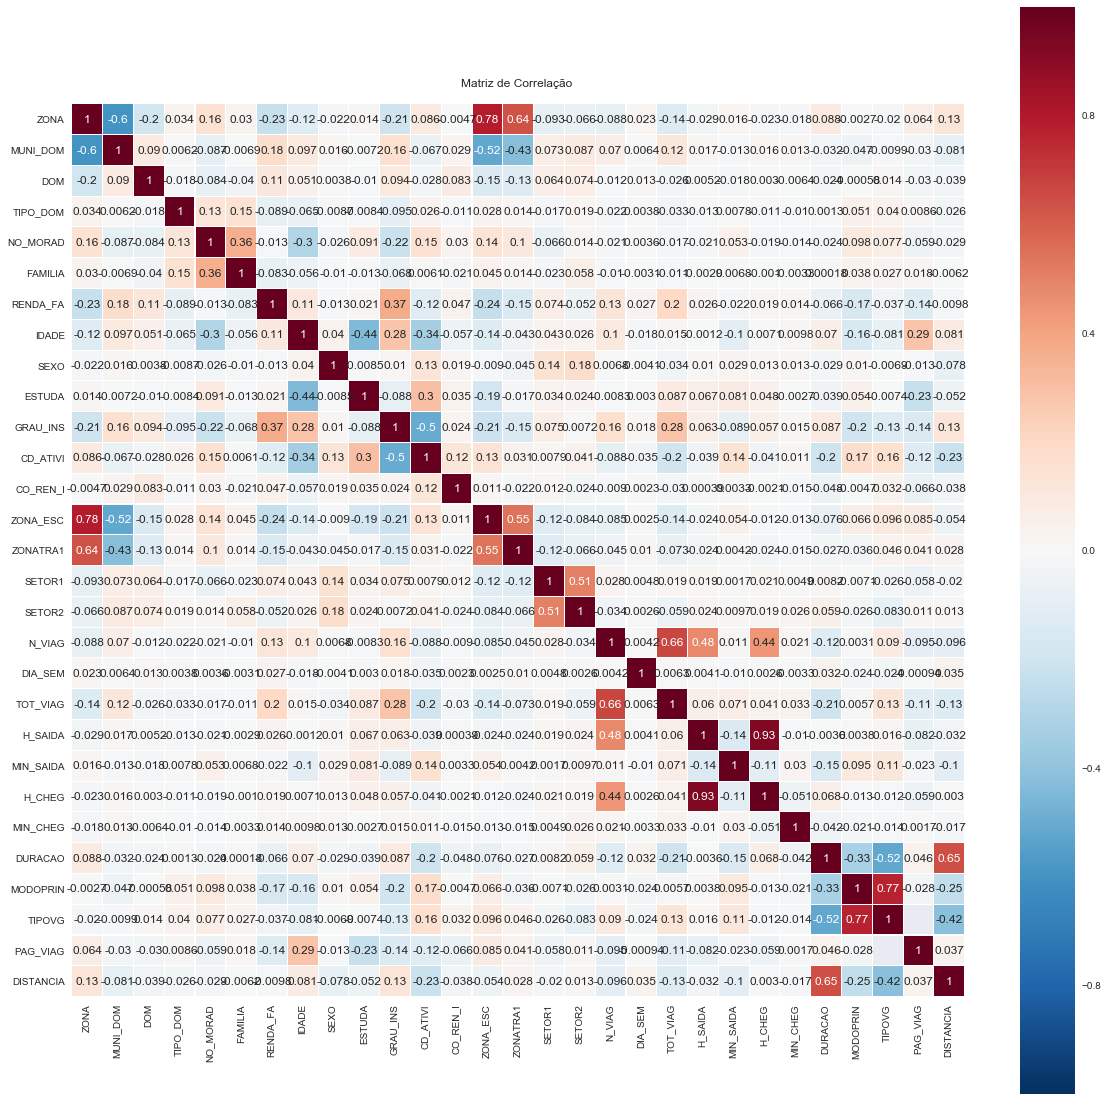

In [224]:
plt.figure(figsize=(20,20))
plt.title('Matriz de Correlação \n')
sns.heatmap(df1.corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)

E através dessa simples análise podemos desconfiar de algumas correlações, o que já nos gera algumas perguntas?

##### Qual a relação entre o Grau de Instrução e a Renda Familiar, quanto maior o grau de instrução maior a renda familiar?
##### Qual a relação entre o Grau de Instrução e o Total de Viagens no dia, quanto maior o grau de instrução maior ou menor o número total de viagens no dia?

Abaixo está o gráfico da quantidade de valores únicos das variáveis escolhidas em df1.

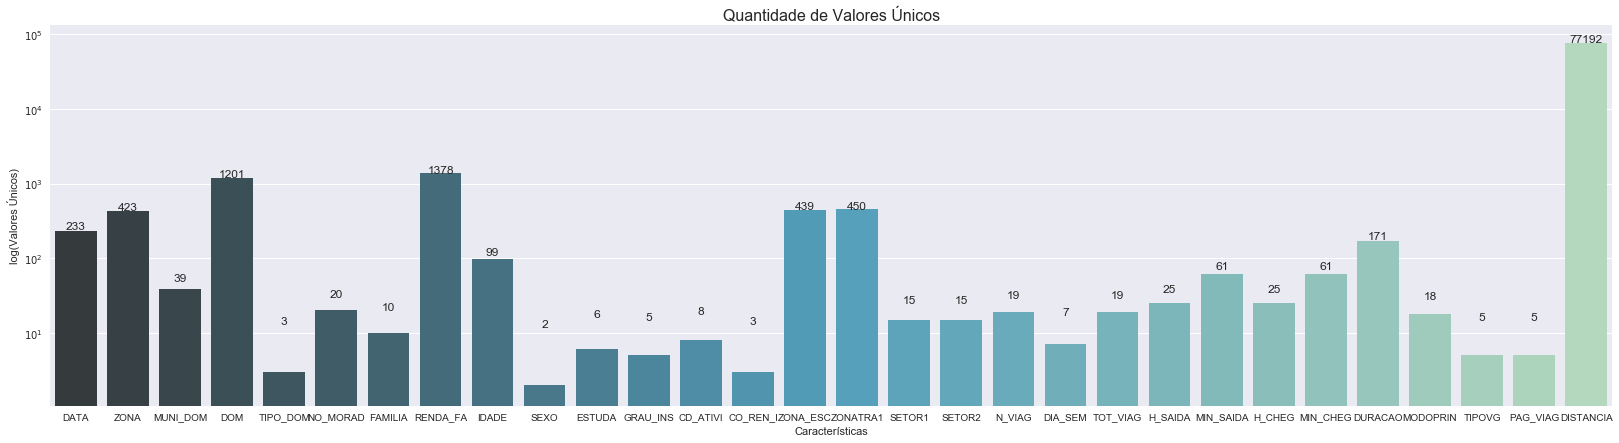

In [225]:
plt.figure(figsize=(28, 7))
uniques = [len(df1[col].unique()) for col in df1.columns]
ax = sns.barplot(df1.columns, uniques, log=True, palette="GnBu_d")
ax.set(xlabel='Características', ylabel='log(Valores Únicos)', title='Quantidade de Valores Únicos')
ax.title.set_size(16)
for p, uniq in zip(ax.patches, uniques):
    ax.text(p.get_x()+p.get_width()/2., p.get_height() + 10, uniq, ha="center") 

O que nos permite ver que a variável DISTANCIA está numa ordem de grandeza totalmente distuante das demais, o que nos leva a olhar com cuidado pra essa variável, pois ela parece não retornar uma informação muito útil.

A função criada abaixo tem por objetivo, excluir os valores vazios do DataFrame.

In [226]:
def NOTNULL(df):
    df2 = df
    columns = df.columns
    for i in range(len(columns)):
        df2 = df2[df2[columns[i]].notnull()]
    return df2

In [227]:
df2 = NOTNULL(df1)

In [228]:
df2

,DATA,ZONA,MUNI_DOM,DOM,TIPO_DOM,NO_MORAD,FAMILIA,RENDA_FA,IDADE,SEXO,...,TOT_VIAG,H_SAIDA,MIN_SAIDA,H_CHEG,MIN_CHEG,DURACAO,MODOPRIN,TIPOVG,PAG_VIAG,DISTANCIA
1918,2007-10-19,5,36,5063,1,3,1,5000.00,45,2,...,4,7.0,30.0,8.0,30.0,60.0,12.0,1.0,1.0,10541.60
1919,2007-10-19,5,36,5063,1,3,1,5000.00,45,2,...,4,12.0,30.0,13.0,30.0,60.0,12.0,1.0,1.0,10541.60
1998,2007-11-06,5,36,5077,1,5,1,3350.00,20,1,...,4,9.0,0.0,9.0,40.0,40.0,12.0,1.0,1.0,2746.68
1999,2007-11-06,5,36,5077,1,5,1,3350.00,20,1,...,4,12.0,30.0,13.0,10.0,40.0,12.0,1.0,1.0,2765.93
2000,2007-11-06,5,36,5077,1,5,1,3350.00,20,1,...,4,18.0,30.0,19.0,10.0,40.0,12.0,1.0,1.0,2034.89
2001,2007-11-06,5,36,5077,1,5,1,3350.00,20,1,...,4,22.0,30.0,23.0,15.0,45.0,12.0,1.0,1.0,2052.71
2043,2007-12-07,5,36,5090,1,1,1,2104.85,34,1,...,5,7.0,30.0,8.0,0.0,30.0,12.0,1.0,2.0,3602.30
2044,2007-12-07,5,36,5090,1,1,1,2104.85,34,1,...,5,12.0,10.0,13.0,0.0,50.0,12.0,1.0,2.0,3588.34
2045,2007-12-07,5,36,5090,1,1,1,2104.85,34,1,...,5,13.0,30.0,16.0,0.0,150.0,1.0,1.0,1.0,5404.02
2046,2007-12-07,5,36,5090,1,1,1,2104.85,34,1,...,5,17.0,30.0,18.0,0.0,30.0,1.0,1.0,1.0,6958.38


E ao refazermos as análises iniciais temos:

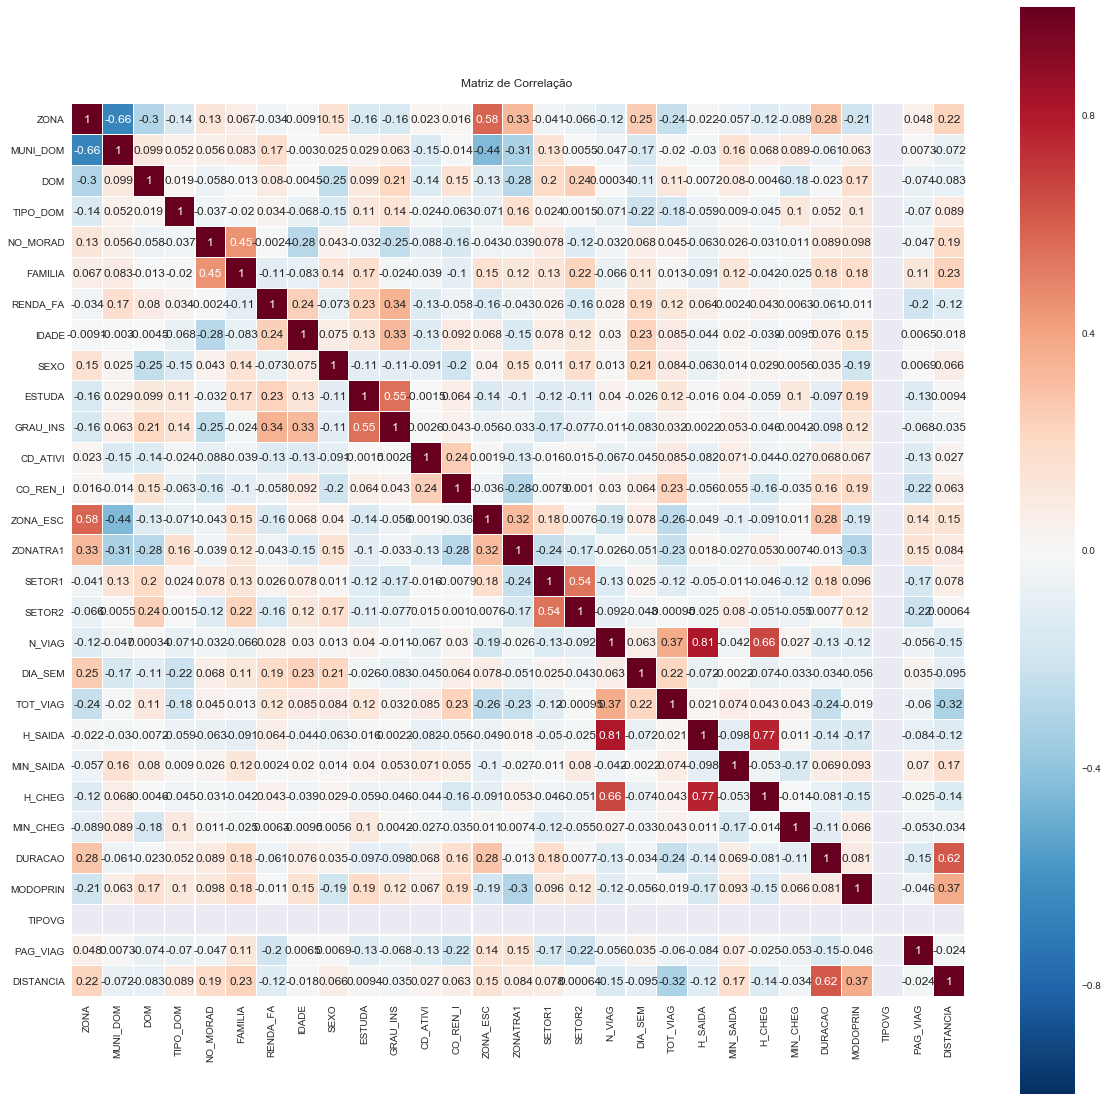

In [229]:
plt.figure(figsize=(20,20))
plt.title('Matriz de Correlação \n')
sns.heatmap(df2.corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)

Observamos que a primeira pergunta realmente faz sentido, o questionamento, e surgem outros como:

#### A Zona aonde a pessoa reside influencia aonde ela trabalho ou estuda?
#### A Zona aonde a pessoa estuda influencia aonde ela trabalha?
#### A Zona aonde a pessoa reside influencia a distância até seu destino?

Excluindo a variável DISTANCIA, e observando os valores únicos novamente.

In [230]:
df3 = df2.drop('DISTANCIA',axis=1)

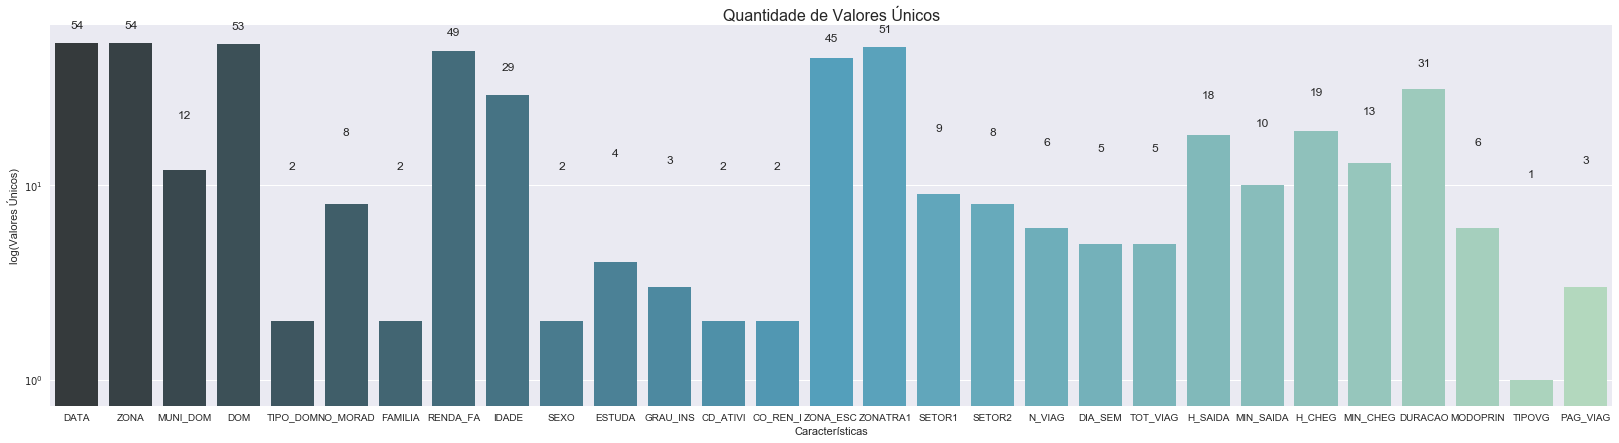

In [231]:
plt.figure(figsize=(28, 7))
uniques = [len(df3[col].unique()) for col in df3.columns]
ax = sns.barplot(df3.columns, uniques, log=True, palette="GnBu_d")
ax.set(xlabel='Características', ylabel='log(Valores Únicos)', title='Quantidade de Valores Únicos')
ax.title.set_size(16)
for p, uniq in zip(ax.patches, uniques):
    ax.text(p.get_x()+p.get_width()/2., p.get_height() + 10, uniq, ha="center") 

Observe que ao chegar no final da semana aumentasse consideravelmente o tempo gasto com trânsito, supondo a frota de transporte público constante durante a semana, temos mais um questionamento:

#### Nas quintas e sextas as pessoas optam mais por saírem de carro ao invés de ir de transporte público?

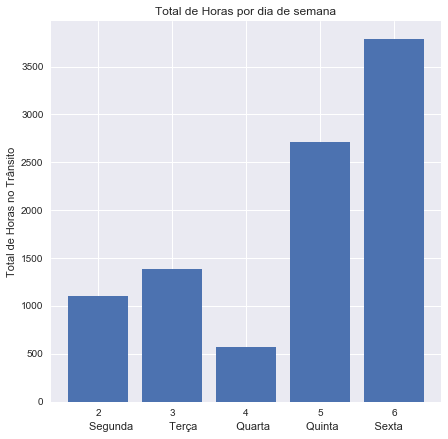

In [232]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set(xlabel="Segunda            Terça             Quarta            Quinta            Sexta", ylabel='Total de Horas no Trânsito', title='Total de Horas por dia de semana')
plt.bar([i for i in range(2,7)],[sum(list(df3[df3['DIA_SEM'] == i].DURACAO)) for i in range(2,7)])
plt.show()

Observando a proporção de Homens e Mulheres, temos que a mesma não encontra-se enviesada uma vez que a proporção permanece semelhante a população real, além da amostra.

In [233]:
df3['SEXO'] = df3['SEXO'] % 2

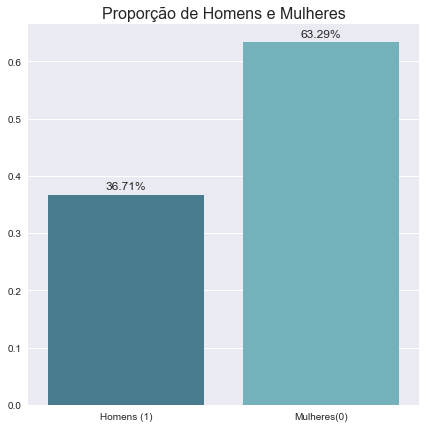

In [234]:
attributed_train = (df3['SEXO'].value_counts()/len(df3['SEXO']))

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
sns.barplot(['Homens (1)', 'Mulheres(0)'], [attributed_train[1],attributed_train[0]], palette='GnBu_d')
ax.set_title('Proporção de Homens e Mulheres')
ax.title.set_size(16)
for p, uniq in zip(ax.patches,[attributed_train[1],attributed_train[0]]):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+0.01, '{}%'.format(round(uniq * 100, 2)), ha="center")

In [247]:
tab01 = pd.read_excel('Tab01_OD2007.xls',skiprows = list(range(0,7)))
tab01 = tab01[0:460]
tab01

,Zona,Nome,Domicílios,Famílias,População,Matrículas Escolares,Empregos,Automóveis Particulares,Viagens Produzidas,Viagens Atraídas,Área Total (ha)
0,1,Sé,875.00010,875.00010,2345.999468,7842.271051,91677.838184,192.425980,160181.863042,160363.027936,56.46
1,2,Parque Dom Pedro,1577.99987,1577.99987,4272.999093,2102.875657,54089.251555,369.675070,119099.810550,121018.077570,113.39
2,3,Praça João Mendes,4031.99990,4031.99990,10217.996369,4101.631013,21367.624243,660.414616,56935.133704,56019.097119,48.65
3,4,Ladeira da Memória,8376.00052,9497.19744,18195.001921,7110.912469,37168.610276,2277.446518,86135.358367,87466.826553,73.14
4,5,República,5133.00033,5133.00033,10666.002856,4653.528054,114708.244677,1610.593984,177494.370131,177899.930328,75.24
5,6,Santa Ifigênia,5865.00036,5865.00036,14219.000641,2999.660407,49742.114249,1537.207984,95137.658328,95393.294456,82.93
6,7,Luz,3726.99995,3996.59515,11370.994826,13239.456443,44822.447869,2069.797354,105197.605260,106110.426544,153.27
7,8,Bom Retiro,1910.00005,1953.11395,6201.998053,3010.564173,15585.967880,1101.606405,26522.244484,27446.001906,140.91
8,9,Ponte Pequena,1445.99984,1824.60797,4461.999139,4388.092202,18530.953117,454.304368,32221.622800,31878.218671,129.33
9,10,Canindé,516.00000,536.29221,1240.000377,5530.823838,6502.547285,301.619563,17967.293290,18035.976238,81.28


Acredito que ao usar as tabelas adicionais como a tab01, podemos responder coisas como quantidade de viagem por pessoa de cada região, e outros dados socioeconômicos.